## Задание

Постройте модель для классификации FashionMNIST. Попробуйте получить качество на тестовой выборке не ниже 89,5%

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import nn
import numpy as np
import torchvision as tv
import time

In [3]:
BATCH_SIZE=256

In [4]:
train_dataset = tv.datasets.FashionMNIST('../data/', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('../data/', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

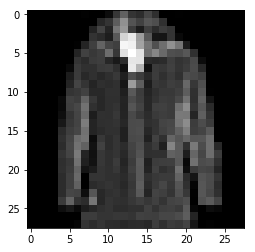

In [5]:
plt.imshow(train_dataset[19][0].numpy().reshape(28,28), cmap='gray')

In [6]:
train_dataset[0][1]

9

In [7]:
def test_model(model):
    # model testing
    X = train_dataset[0][0]
    X = X.reshape(1, 1, 28, 28)
    print(X.shape)
    for l in model:
        X = l(X)
        print("Layer {}. X shape: {}".format(l, X.shape))

In [8]:
def fit_model(num_epochs, model):
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.

        model.train()
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)

        model.eval()
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)

        print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
            ep, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )

In [47]:
dropout_probaility = 0.5

model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, kernel_size=5, padding=2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Conv2d(6, 12, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.BatchNorm2d(12), # неплохо отработал слой в плане повышения качества 
    torch.nn.Flatten(),
    torch.nn.Linear(300, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 10)
)

loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30

In [48]:
test_model(model)

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 6, 28, 28])
Layer ReLU(). X shape: torch.Size([1, 6, 28, 28])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 6, 14, 14])
Layer Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 12, 10, 10])
Layer ReLU(). X shape: torch.Size([1, 12, 10, 10])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 12, 5, 5])
Layer BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True). X shape: torch.Size([1, 12, 5, 5])
Layer Flatten(). X shape: torch.Size([1, 300])
Layer Linear(in_features=300, out_features=50, bias=True). X shape: torch.Size([1, 50])
Layer ReLU(). X shape: torch.Size([1, 50])
Layer Linear(in_features=50, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [49]:
fit_model(num_epochs, model)

ep: 0, train_loss: 0.6027656607171322, train_acc: 0.79355, test_loss: 0.4187826104462147, test_acc: 0.8495
ep: 1, train_loss: 0.33962345440337, train_acc: 0.8773333333333333, test_loss: 0.3453919284045696, test_acc: 0.8752
ep: 2, train_loss: 0.29761584489903553, train_acc: 0.89155, test_loss: 0.3226435471326113, test_acc: 0.8833
ep: 3, train_loss: 0.27376590555018565, train_acc: 0.9004333333333333, test_loss: 0.3069950744509697, test_acc: 0.8889
ep: 4, train_loss: 0.2564999960204388, train_acc: 0.9060333333333334, test_loss: 0.2901306491345167, test_acc: 0.8933
ep: 5, train_loss: 0.24282302957900026, train_acc: 0.9114666666666666, test_loss: 0.29185800552368163, test_acc: 0.8944
ep: 6, train_loss: 0.23178384037728006, train_acc: 0.9157833333333333, test_loss: 0.2912297498434782, test_acc: 0.8966


KeyboardInterrupt: 